In [15]:
import pandas as pd
import numpy as np
import IPython.display as ipd
from parser import get_dataset_splits
from utilities import silence_split,split_audio_to_words
import tqdm
import torch
import librosa
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

/tmp/ipykernel_1691496/3251739785.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [16]:
# load dataset splits
sample_rate = 16000
test_set, train_set, val_set = get_dataset_splits(sample_rate)
set2df = {"train": train_set, "val": val_set, "test": test_set}
set2df['train']

parsing test data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 130/130 [00:00<00:00, 130.38it/s]


,wav_path,wav_name,audio,duration,text,speaker
0,./Data/train/an4/wav/an1-mblw-b.wav,an1-mblw-b,"[0.00061035156, 0.00030517578, 0.00030517578, ...",1.5,X I SIXTY ONE,mblw
1,./Data/train/an4/wav/an10-fjmd-b.wav,an10-fjmd-b,"[-0.00030517578, -0.00048828125, -0.0006103515...",1.6,G TWO EIGHTY NINE,fjmd
2,./Data/train/an4/wav/an100-mskh-b.wav,an100-mskh-b,"[-0.00012207031, -6.1035156e-05, 0.0, 0.000427...",0.8,YES,mskh
3,./Data/train/an4/wav/an101-mrcb-b.wav,an101-mrcb-b,"[-0.0013427734, -0.0014038086, -0.0015258789, ...",3.5,R E W Y EIGHT FIVE SIX,mrcb
4,./Data/train/an4/wav/an102-mrcb-b.wav,an102-mrcb-b,"[-0.00018310547, -0.00012207031, -0.0001831054...",0.8,NO,mrcb
...,...,...,...,...,...,...
848,./Data/train/an4/wav/cen8-mtcv-b.wav,cen8-mtcv-b,"[0.0006713867, 0.00079345703, 0.0007324219, 0....",2.9,ONE TWO SEVEN SIX THREE,mtcv
849,./Data/train/an4/wav/cen8-mtje-b.wav,cen8-mtje-b,"[0.0012512207, 0.0009460449, 0.0005187988, 0.0...",2.0,TEN TWENTY EIGHT SIXTY NINE,mtje
850,./Data/train/an4/wav/cen8-mtos-b.wav,cen8-mtos-b,"[0.0013427734, 0.0010375977, 0.00061035156, 0....",2.1,TWELVE TEN SIXTY NINE,mtos
851,./Data/train/an4/wav/cen8-mtxj-b.wav,cen8-mtxj-b,"[-0.0005187988, -0.0005187988, -0.00039672852,...",2.7,OCTOBER TWENTY THIRD NINETEEN SIXTY SEVEN,mtxj


# KNN WER/CER results

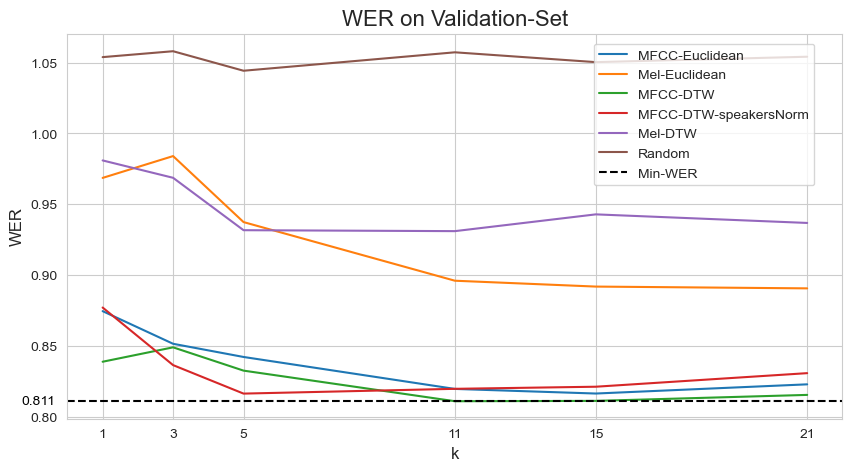

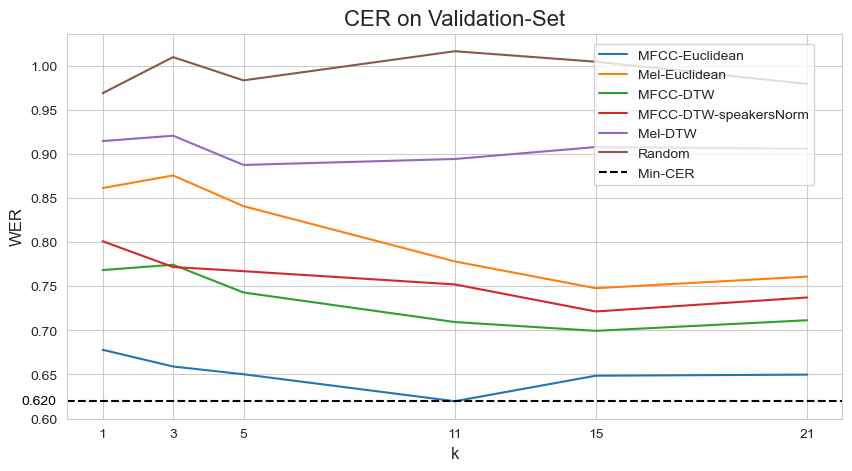

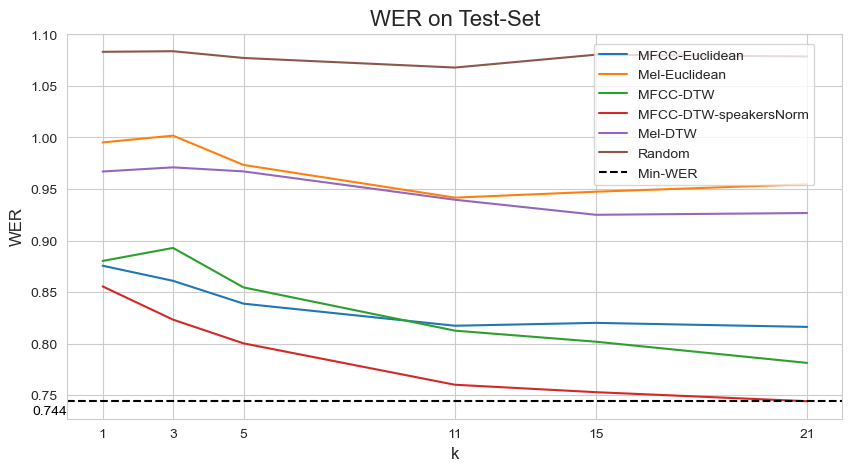

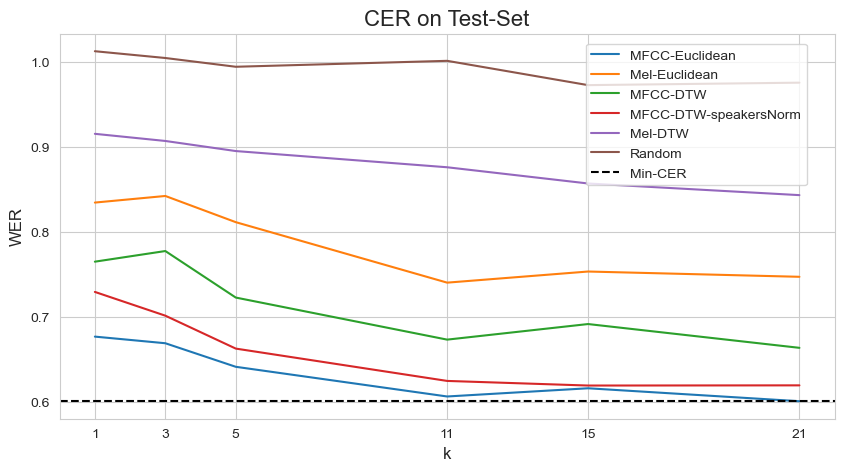

In [17]:
import pandas as pd

csv_file_path = 'results_df_old.csv'
results_df = pd.read_csv(csv_file_path)
random_results_df = pd.read_csv('random_results_df.csv')
mfcc_dtw_speaker_norm_val_results_df = pd.read_csv("speaker_norm_val_results_df.csv")
mfcc_dtw_speaker_norm_test_results_df = pd.read_csv("speaker_norm_test_results_df.csv")


# The string you want to search for
features_string = 'MFCC'
dist_string = 'euclidean'
preprocess_string = 'None'
MFCC_euclidean_none = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

features_string = 'MFCC'
dist_string = 'euclidean'
preprocess_string = 'features_normalization'
MFCC_euclidean_feat_norm = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

features_string = 'MFCC'
dist_string = 'euclidean'
preprocess_string = 'speaker_normalization'
MFCC_euclidean_speaker_norm = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

features_string = 'Mel'
dist_string = 'euclidean'
preprocess_string = 'None'
Mel_euclidean_none = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

features_string = 'MFCC'
dist_string = 'dtw'
preprocess_string = 'None'
MFCC_dtw_none = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

features_string = 'MFCC'
dist_string = 'dtw'
preprocess_string = 'features_normalization'
MFCC_dtw_feat_norm = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                        results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]

# features_string = 'MFCC'
# dist_string = 'dtw'
# preprocess_string = 'speaker_normalization'
# MFCC_dtw_speaker_norm = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
#                                         results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
#                                         results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]


features_string = 'Mel'
dist_string = 'dtw'
preprocess_string = 'None'
Mel_dtw_none = results_df[results_df['Unnamed: 0'].str.contains(features_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(dist_string, case=False) &
                                 results_df['Unnamed: 0'].str.contains(preprocess_string, case=False)]



k_vals = np.array([1,3,5,11,15,21])

####################### VAL SET #################################################
min_error = np.inf
plt.figure(figsize=(10, 5))
val_wer = MFCC_euclidean_none['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-Euclidean')
# val_wer = MFCC_euclidean_feat_norm['val_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-featuresNorm')
# val_wer = MFCC_euclidean_speaker_norm['val_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-speakersNorm')
val_wer = Mel_euclidean_none['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-Euclidean')
val_wer = MFCC_dtw_none['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW')
# val_wer = MFCC_dtw_feat_norm['val_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-DTW-featuresNorm')
val_wer = mfcc_dtw_speaker_norm_val_results_df['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW-speakersNorm')
val_wer = Mel_dtw_none['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-DTW')
val_wer = random_results_df['val_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Random')

plt.axhline(y=min_error, color='black', linestyle='--',label='Min-WER')
plt.text(-1.3, min_error, f'{min_error:.3f}', color='black', verticalalignment='center')


plt.legend(loc='center left', bbox_to_anchor=(0.67, 0.79))
plt.title("WER on Validation-Set",fontsize=16)
plt.ylabel("WER",fontsize=12)
plt.xlabel("k",fontsize=12)
plt.xticks(k_vals)
plt.show()

min_error = np.inf
plt.figure(figsize=(10, 5))
val_wer = MFCC_euclidean_none['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-Euclidean')
# val_wer = MFCC_euclidean_feat_norm['val_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-featuresNorm')
# val_wer = MFCC_euclidean_speaker_norm['val_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
#plt.plot(k_vals,val_wer,label='MFCC-Euclidean-speakersNorm')
val_wer = Mel_euclidean_none['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-Euclidean')
val_wer = MFCC_dtw_none['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW')
# val_wer = MFCC_dtw_feat_norm['val_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-DTW-featuresNorm')
val_wer = mfcc_dtw_speaker_norm_val_results_df['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW-speakersNorm')
val_wer = Mel_dtw_none['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-DTW')
val_wer = random_results_df['val_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Random')

plt.axhline(y=min_error, color='black', linestyle='--',label='Min-CER')
plt.text(-1.3, min_error, f'{min_error:.3f}', color='black', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(0.67, 0.79))
plt.title("CER on Validation-Set",fontsize=16)
plt.ylabel("WER",fontsize=12)
plt.xlabel("k",fontsize=12)
plt.xticks(k_vals)
plt.show()

####################### TEST SET #################################################
min_error = np.inf
plt.figure(figsize=(10, 5))
val_wer = MFCC_euclidean_none['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-Euclidean')
# val_wer = MFCC_euclidean_feat_norm['test_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-featuresNorm')
# val_wer = MFCC_euclidean_speaker_norm['test_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
#plt.plot(k_vals,val_wer,label='MFCC-Euclidean-speakersNorm')
val_wer = Mel_euclidean_none['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-Euclidean')
val_wer = MFCC_dtw_none['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW')
# val_wer = MFCC_dtw_feat_norm['test_wer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-DTW-featuresNorm')
val_wer = mfcc_dtw_speaker_norm_test_results_df['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW-speakersNorm')
val_wer = Mel_dtw_none['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-DTW')
val_wer = random_results_df['test_wer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Random')

plt.axhline(y=min_error, color='black', linestyle='--',label='Min-WER')
plt.text(-1, min_error - 0.01, f'{min_error:.3f}', color='black', verticalalignment='center')


plt.legend(loc='center left', bbox_to_anchor=(0.67, 0.79))
plt.title("WER on Test-Set",fontsize=16)
plt.ylabel("WER",fontsize=12)
plt.xlabel("k",fontsize=12)
plt.xticks(k_vals)
plt.show()

min_error = np.inf
plt.figure(figsize=(10, 5))
val_wer = MFCC_euclidean_none['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-Euclidean')
# val_wer = MFCC_euclidean_feat_norm['test_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-featuresNorm')
# val_wer = MFCC_euclidean_speaker_norm['test_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-Euclidean-speakersNorm')
val_wer = Mel_euclidean_none['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-Euclidean')
val_wer = MFCC_dtw_none['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW')
# val_wer = MFCC_dtw_feat_norm['test_cer'].to_numpy()
# min_error = min(val_wer.min(), min_error)
# plt.plot(k_vals,val_wer,label='MFCC-DTW-featuresNorm')
val_wer = mfcc_dtw_speaker_norm_test_results_df['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='MFCC-DTW-speakersNorm')
val_wer = Mel_dtw_none['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Mel-DTW')
val_wer = random_results_df['test_cer'].to_numpy()
min_error = min(val_wer.min(), min_error)
plt.plot(k_vals,val_wer,label='Random')

plt.axhline(y=min_error, color='black', linestyle='--',label='Min-CER')
#plt.text(-1.3, min_error, f'{min_error:.3f}', color='black', verticalalignment='center')

plt.legend(loc='center left', bbox_to_anchor=(0.67, 0.79))
plt.title("CER on Test-Set",fontsize=16)
plt.ylabel("WER",fontsize=12)
plt.xlabel("k",fontsize=12)
plt.xticks(k_vals)
plt.show()


# with and without Lanague model comparison

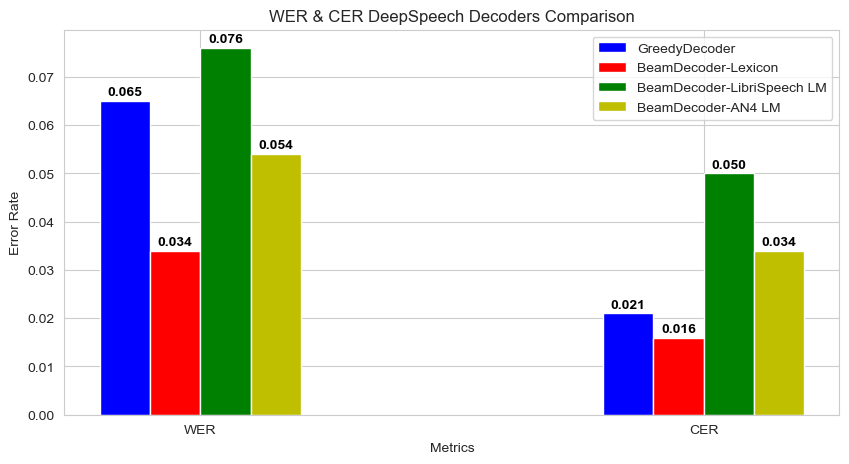

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_bins_value(bins, bar_width, index):
    # Add values above the bars
    for i, value in enumerate(bins):
        plt.text(i + bar_width*index, value + 0.0005, f'{value:.3f}', ha='center', va='bottom', color='black', weight='bold')

# Sample data (replace with your actual data)
metrics = ['WER', 'CER']
bins_model_greedy = [0.065, 0.021]
bins_model_beam_lexicon = [0.034, 0.016]
bins_model_beam_lm_librispeech = [0.076, 0.050]
bins_model_beam_lm_an4 = [0.054, 0.034]

# Create a larger figure
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed


# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = np.arange(2)
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]
r4 = [x + 3*bar_width for x in r1]

# Create the grouped bar graph
plt.bar(r1, bins_model_greedy, color='b', width=bar_width, label='GreedyDecoder')
plt.bar(r2, bins_model_beam_lexicon, color='r', width=bar_width, label='BeamDecoder-Lexicon')
plt.bar(r3, bins_model_beam_lm_librispeech, color='g', width=bar_width, label='BeamDecoder-LibriSpeech LM')
plt.bar(r4, bins_model_beam_lm_an4, color='y', width=bar_width, label='BeamDecoder-AN4 LM')


# Add values above the bars
plot_model_bins_value(bins_model_greedy,bar_width,0)
plot_model_bins_value(bins_model_beam_lexicon,bar_width,1)
plot_model_bins_value(bins_model_beam_lm_librispeech, bar_width, 2)
plot_model_bins_value(bins_model_beam_lm_an4,bar_width,3)



# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Error Rate')
plt.title('WER & CER DeepSpeech Decoders Comparison')
plt.xticks([r + bar_width*1.5 for r in range(len(metrics))], metrics)
plt.legend()

# Save the plot as an image
plt.savefig('error_rate_decoders_comparison.png', dpi=300, bbox_inches='tight')


# Show the graph
plt.show()

# Creating corpus for language model

In [19]:
lowercase_sentences = train_set['text'].str.lower()
output_file_path = "train_corpus.txt"
with open(output_file_path, "w") as f:
    f.write("\n".join(lowercase_sentences))
vocabulary = set(train_set['text'].map(lambda text: text.split()).explode())

# Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch

In [21]:
# get features
train_set['features'] = train_set['audio'].map(lambda audio: torch.tensor(librosa.feature.mfcc(y=audio,sr=sample_rate).flatten()))
X = torch.nn.utils.rnn.pad_sequence(train_set['features'].to_list(), batch_first=True).numpy()
# perform dimension reduction using pca
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
# perform clustring
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)

/cs/labs/danix/orig333/Softwares/anaconda3/envs/nemo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

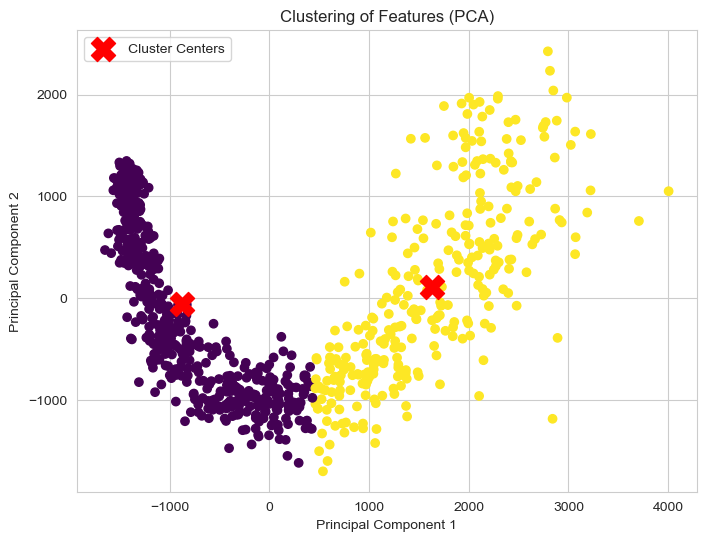

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Features (PCA)')
plt.legend()
plt.show()

In [23]:
# sample from cluster
chosen_cluster = 1
indices_chosen_cluster = np.where(kmeans.labels_ == chosen_cluster)[0]
sample_index = np.random.choice(indices_chosen_cluster)
ipd.Audio(data=train_set['audio'].iloc[sample_index],rate=sample_rate)


# Features normalization

In [24]:
train_set['features'] = train_set['audio'].map(lambda audio: librosa.feature.mfcc(y=audio,sr=sample_rate))

# Speaker-Adaptive Normalization

/tmp/ipykernel_1691496/1563781330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrcb_rows['features'] = mrcb_rows['audio'].map(lambda audio: librosa.feature.mfcc(y=audio,sr=sample_rate))


[Text(0.5, 1.0, 'MFCC')]

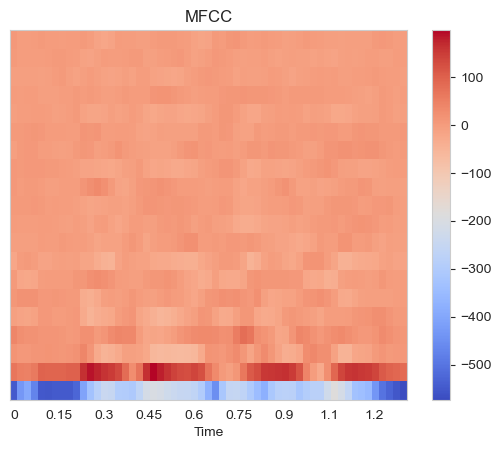

In [25]:
mrcb_rows = set2df['train'][set2df['train']['speaker'] == 'mrcb']
mrcb_rows['features'] = mrcb_rows['audio'].map(lambda audio: librosa.feature.mfcc(y=audio,sr=sample_rate))

index = 10
fig, ax = plt.subplots()
img = librosa.display.specshow(mrcb_rows['features'].iloc[index], x_axis='time')
fig.colorbar(img, ax=[ax])
ax.set(title='MFCC')

/tmp/ipykernel_1691496/1378260004.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrcb_rows['normalized_features'] = list(normalized_features[:])


[Text(0.5, 1.0, 'MFCC')]

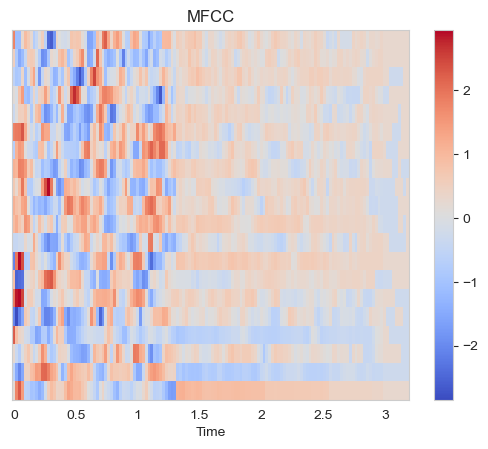

In [26]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def vocal_tract_length_normalization(mfccs):
    # Apply mean normalization across frames for each speaker
    return mfccs - np.mean(mfccs, axis=0)

tensor_list = [torch.tensor(element.T) for element in mrcb_rows['features']]
features_padded = torch.nn.utils.rnn.pad_sequence(tensor_list, batch_first=True)
features_padded = features_padded.permute(0,2,1).numpy()
normalized_features = (features_padded - np.mean(features_padded, axis=0))/np.std(features_padded, axis=0)
mrcb_rows['normalized_features'] = list(normalized_features[:])

fig, ax = plt.subplots()
img = librosa.display.specshow(mrcb_rows['normalized_features'].iloc[index], x_axis='time')
fig.colorbar(img, ax=[ax])
ax.set(title='MFCC')

In [27]:
pd.read_csv('results_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results_df.csv'

# Separating words by silence

In [ ]:
idx = 7
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
librosa.display.waveshow(set2df['train']['audio'][idx])
plt.title(f"{set2df['train']['text'][idx]}")
plt.show()
ipd.Audio(data=set2df['train']['audio'][idx],rate=sample_rate)

In [ ]:
max_val = np.abs(set2df['train']['audio'][idx]).max()
audio_abs = np.abs(set2df['train']['audio'][idx] / max_val)
amp_th = 0.1
frame_size = 800
percentile_value = 80
hop_length = frame_size - 1
word_amp = []
silence_amp = []
for i in range(0, len(audio_abs), hop_length):
    amplitude_envelope_current_frame = np.percentile(audio_abs[i:i+frame_size], percentile_value)
    if amplitude_envelope_current_frame > amp_th:
        word_amp +=[amplitude_envelope_current_frame]*frame_size
        silence_amp += [0]*frame_size
    else:
        word_amp += [0]*frame_size
        silence_amp += [amplitude_envelope_current_frame]*frame_size

print(f"{len(word_amp)},{len(silence_amp)}")

percentile = np.percentile(audio_abs,percentile_value)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.set_ylim(-0.1, 1.)
ax.set_yticks(np.arange(0,1, 0.05))
time_array = np.arange(len(audio_abs))
plt.plot(time_array,audio_abs)
plt.plot(time_array,word_amp[:len(audio_abs)],color='b',linestyle='solid',label="word")
plt.plot(time_array,silence_amp[:len(audio_abs)],color='black',linestyle='solid',label="silence")
plt.axhline(y=amp_th,color='r',linestyle='--',label=f'amp_th={amp_th}')
plt.title(f"Silence Split on '{set2df['train']['text'][idx]}'", fontsize=16)
plt.legend()
plt.show()


In [ ]:
from utilities import silence_split
indexes = silence_split(set2df['train']['audio'][idx])
print(indexes)
ipd.Audio(data=set2df['train']['audio'][idx][indexes[0,0]:indexes[0,1]],rate=sample_rate)

# Compare same and different words with short and long lengths with eucl and dtw distances

In [ ]:
train_df = split_audio_to_words(train_set)

In [ ]:
one_dataframe = train_df[train_df['word'] == 'one']
one_dataframe["features"] = one_dataframe['audio'].map(lambda audio: librosa.feature.mfcc(y=audio,sr=16000))
one_dataframe["num_frames"] = one_dataframe['features'].map(lambda features: len(features[1]))
one_dataframe_sorted = one_dataframe.sort_values(by='num_frames')

two_dataframe = train_df[train_df['word'] == 'two']
two_dataframe["features"] = two_dataframe['audio'].map(lambda audio: librosa.feature.mfcc(y=audio,sr=16000))
two_dataframe["num_frames"] = two_dataframe['features'].map(lambda features: len(features[1]))
two_dataframe_sorted = two_dataframe.sort_values(by='num_frames')
two_dataframe_sorted

In [ ]:
index = 40
print(f"num_frames:{one_dataframe_sorted['num_frames'].iloc[index]}")
short_one_man = one_dataframe_sorted['audio'].iloc[index]
short_one_man_feat = one_dataframe_sorted['features'].iloc[index]

index = 55
print(f"num_frames:{two_dataframe_sorted['num_frames'].iloc[index]}")
short_two_man = two_dataframe_sorted['audio'].iloc[index]
short_two_man_feat = two_dataframe_sorted['features'].iloc[index]

index = 45
print(f"num_frames:{one_dataframe_sorted['num_frames'].iloc[index]}")
short_one_woman = one_dataframe_sorted['audio'].iloc[index]
short_one_woman_feat = one_dataframe_sorted['features'].iloc[index]


index = 59
print(f"num_frames:{two_dataframe_sorted['num_frames'].iloc[index]}")
short_two_woman = two_dataframe_sorted['audio'].iloc[index]
short_two_woman_feat = two_dataframe_sorted['features'].iloc[index]


short_list_feat = [short_one_man_feat, short_two_man_feat, short_one_woman_feat, short_two_woman_feat]
ipd.Audio(data= short_one_man, rate=sample_rate)
ipd.Audio(data=short_two_man,rate=sample_rate)
ipd.Audio(data= short_one_woman, rate=sample_rate)
ipd.Audio(data=short_two_woman,rate=sample_rate)

In [ ]:
index = -28
print(f"num_frames:{one_dataframe_sorted['num_frames'].iloc[index]}")
long_one_man = one_dataframe_sorted['audio'].iloc[index]
long_one_man_feat = one_dataframe_sorted['features'].iloc[index]


index = -22
print(f"num_frames:{two_dataframe_sorted['num_frames'].iloc[index]}")
long_two_man = two_dataframe_sorted['audio'].iloc[index]
long_two_man_feat = two_dataframe_sorted['features'].iloc[index]


index = -11
print(f"num_frames:{one_dataframe_sorted['num_frames'].iloc[index]}")
long_one_woman = one_dataframe_sorted['audio'].iloc[index]
long_one_woman_feat = one_dataframe_sorted['features'].iloc[index]



index = -18
print(f"num_frames:{two_dataframe_sorted['num_frames'].iloc[index]}")
long_two_woman = two_dataframe_sorted['audio'].iloc[index]
long_two_woman_feat = two_dataframe_sorted['features'].iloc[index]


long_list_feat = [long_one_man_feat, long_two_man_feat, long_one_woman_feat, long_two_woman_feat]
ipd.Audio(data=long_one_man,rate=sample_rate)
ipd.Audio(data=long_two_man,rate=sample_rate)
ipd.Audio(data=long_one_woman,rate=sample_rate)
ipd.Audio(data=long_two_woman, rate=sample_rate)

In [ ]:
def euclidean_dist(x, y):
    seq1, seq2 = torch.tensor(x.T), torch.tensor(y.T)
    seq1, seq2 = torch.nn.utils.rnn.pad_sequence([seq1, seq2], batch_first=True)
    return torch.linalg.vector_norm(seq1 - seq2)

dtw_dist = lambda x, y: librosa.sequence.dtw(x, y)[0][-1, -1]

feat_arr = short_list_feat + long_list_feat

# Initialize an empty matrix to store the distances
euclidean_distances = np.zeros((len(feat_arr), len(feat_arr)))
dtw_distances = np.zeros((len(feat_arr), len(feat_arr)))

# compute distances
for i in range(len(feat_arr)):
    for j in range(len(feat_arr)):
        euclidean_distances[i, j] = euclidean_dist(feat_arr[i], feat_arr[j])
        dtw_distances[i,j] = dtw_dist(feat_arr[i], feat_arr[j])

# set precision to only 3 digits after decimal point
euclidean_distances = np.round(euclidean_distances,3)
dtw_distances = np.round(dtw_distances,3)


# store to csv
# Get the shape of the matrices
shape = euclidean_distances.shape

# Initialize an empty list to store data for the DataFrame
data = []

# Loop through the elements of the matrices and create tuples
for i in range(shape[0]):
    row = []
    for j in range(shape[1]):
        row.append((euclidean_distances[i, j], dtw_distances[i, j]))
    data.append(row)

# Create a DataFrame from the list of tuples
distances_df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(shape[1])])
distances_df = distances_df.round(3)
distances_df.to_csv("duration_and_gender_distances_df.csv",float_format='%.3f')

In [ ]:
distances_df

In [ ]:
euclidean_distances

In [ ]:
dtw_distances

In [ ]:
# from metrics.KNN import euclidean_dist
# import librosa
# dtw_dist = lambda x, y: librosa.sequence.dtw(x, y)[0][-1, -1]
#
# one_eucl_dist = euclidean_dist(one_dataframe_sorted['features'].iloc[40],one_dataframe_sorted['features'].iloc[-11])
# one_dtw_dist = dtw_dist(one_dataframe_sorted['features'].iloc[40],one_dataframe_sorted['features'].iloc[-11])
# two_eucl_dist = euclidean_dist(two_dataframe_sorted['features'].iloc[75],two_dataframe_sorted['features'].iloc[-21])
# two_dtw_dist = dtw_dist(two_dataframe_sorted['features'].iloc[75],two_dataframe_sorted['features'].iloc[-21])
# print(f"Words 'one' euclidean_dist={one_eucl_dist}")
# print(f"Words 'two' euclidean_dist={two_eucl_dist}")
# print(f"Words 'one' dtw_dist={one_dtw_dist}")
# print(f"Words 'two' dtw_dist={two_dtw_dist}\n")
#
# one_two_short_eucl_dist = euclidean_dist(one_dataframe_sorted['features'].iloc[40],two_dataframe_sorted['features'].iloc[75])
# one_two_long_eucl_dist = euclidean_dist(one_dataframe_sorted['features'].iloc[-11],two_dataframe_sorted['features'].iloc[-21])
# one_two_short_dtw_dist = dtw_dist(one_dataframe_sorted['features'].iloc[40],two_dataframe_sorted['features'].iloc[75])
# one_two_long_dtw_dist = dtw_dist(one_dataframe_sorted['features'].iloc[-11],two_dataframe_sorted['features'].iloc[-21])
#
# print(f"Short words 'one','two' euclidean_dist={one_two_short_eucl_dist}")
# print(f"Long words 'one','two' euclidean_dist={one_two_long_eucl_dist}")
# print(f"Short words 'one','two' dtw_dist={one_two_short_dtw_dist}")
# print(f"Long words 'one','two' dtw_dist={one_two_long_dtw_dist} \n")
#
# one_short_two_long_eucl_dist = euclidean_dist(one_dataframe_sorted['features'].iloc[40],two_dataframe_sorted['features'].iloc[-21])
# one_short_two_long_dtw_dist = dtw_dist(one_dataframe_sorted['features'].iloc[40], two_dataframe_sorted['features'].iloc[-21])
# one_long_two_short_eucl_dist = euclidean_dist(one_dataframe_sorted['features'].iloc[-11],two_dataframe_sorted['features'].iloc[75])
# one_long_two_short_dtw_dist = dtw_dist(one_dataframe_sorted['features'].iloc[-11],two_dataframe_sorted['features'].iloc[75])
#
# print(f"words short 'one', long 'two' euclidean_dist={one_short_two_long_eucl_dist}")
# print(f"words long 'one', short 'two' euclidean_dist={one_long_two_short_eucl_dist}")
# print(f"words short 'one', long 'two' dtw_dist={one_short_two_long_dtw_dist}")
# print(f"words long 'one', short 'two' dtw_dist={one_long_two_short_dtw_dist}")

